In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 


plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 150
# loading data set as Pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/'
                 'hands-on-exploratory-data-analysis-with-python/'
                 'master/Chapter%207/automobile.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [3]:
# 데이터 정제하기
# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [4]:
# Cleaning the horsepower losses field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int32

In [5]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int32

In [6]:
# univariate analysis: 열 데이터 중심관련 통계량 계산
#calculate mean, median and mode of dat set height
mean = df["height"].mean()
median =df["height"].median()
mode = df["height"].mode()
print(mean , median, mode)

53.72487804878049 54.1 0    50.8
Name: height, dtype: float64


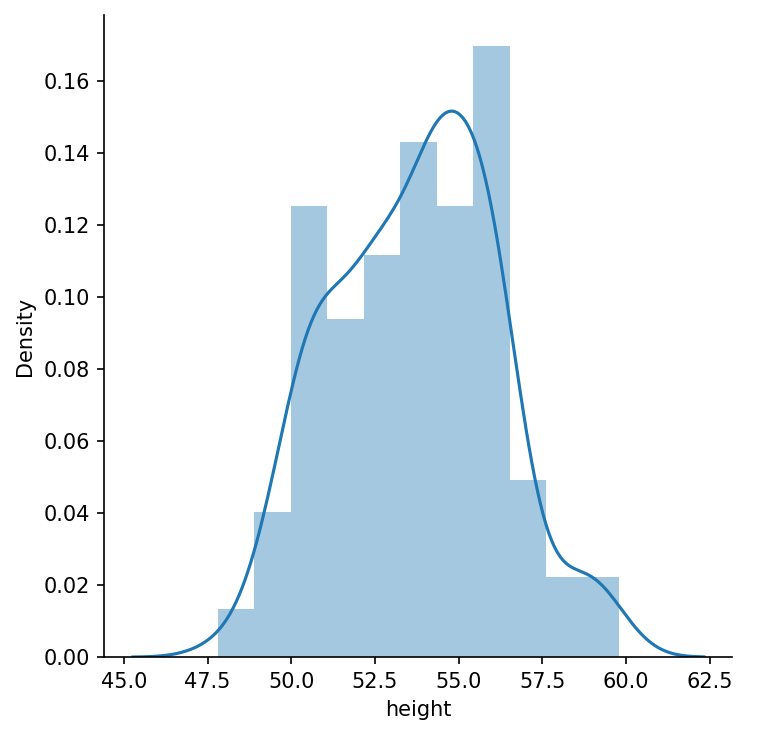

In [7]:
# 데이터 시각화
import warnings
warnings.filterwarnings(action='ignore')

#distribution plot
sns.FacetGrid(df,height = 5).map(sns.distplot,"height").add_legend()

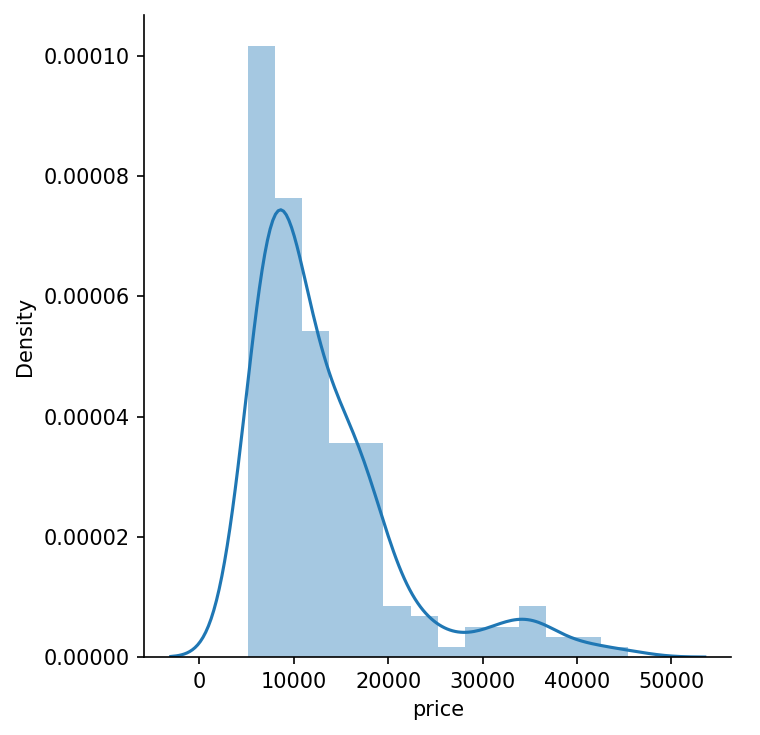

In [8]:
#distribution plot
sns.FacetGrid(df,height=5).map(sns.distplot,"price").add_legend()

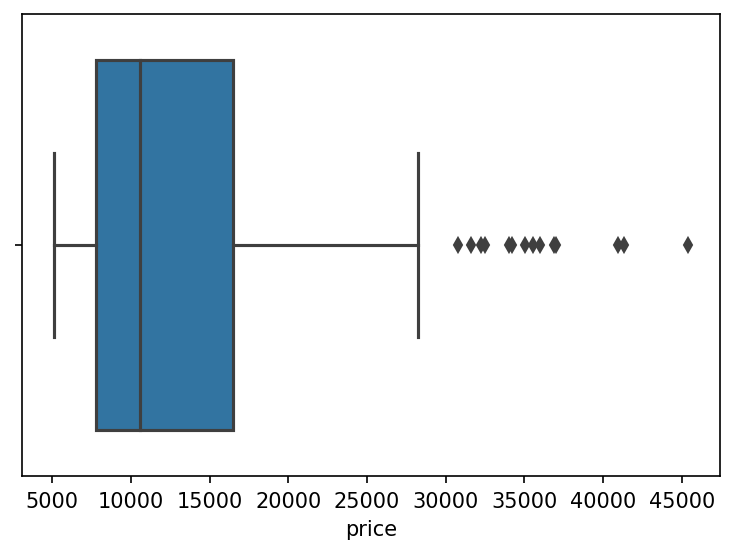

In [9]:
#boxplot for price of cars
sns.boxplot(x="price",data=df)
plt.show()

Text(0, 0.5, 'price')

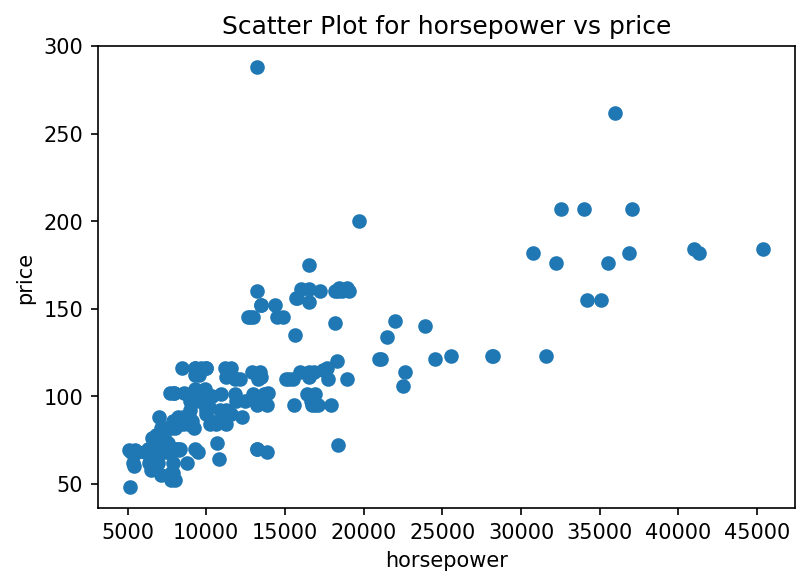

In [10]:
# Bivariate Analysis를 위한 시각화
# plot the relationship between “horsepower” and ”price”
plt.scatter(df["price"], df["horsepower"])
plt.title("Scatter Plot for horsepower vs price")
plt.xlabel("horsepower")
plt.ylabel("price")

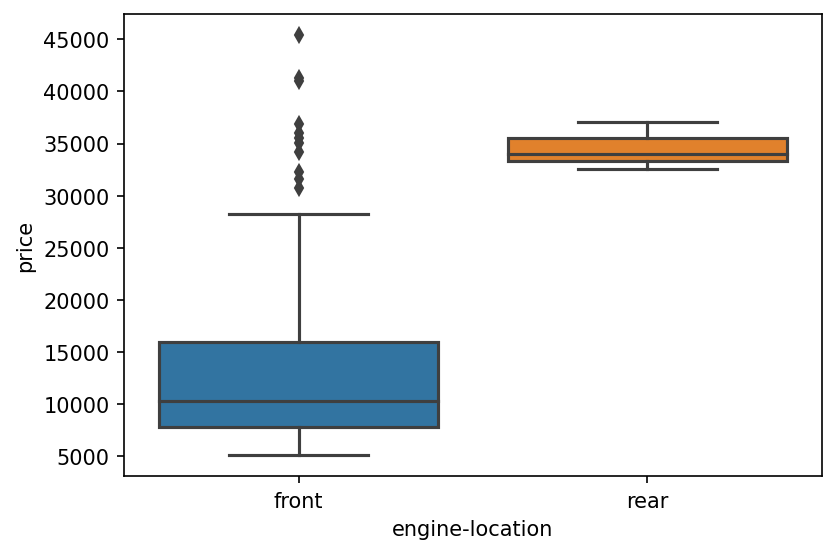

In [11]:
# boxplot
sns.boxplot(x="engine-location",y="price",data=df)
plt.show()

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

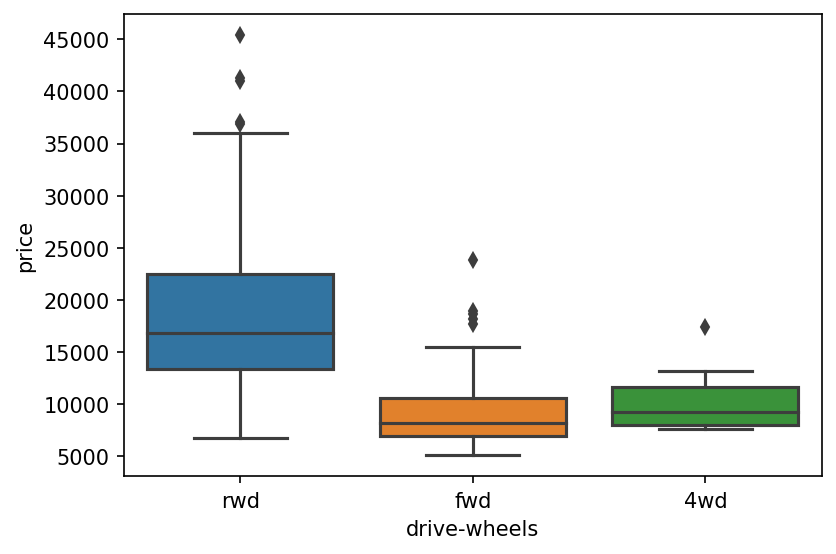

In [12]:
#boxplot to visualize the distribution of "price" with types of "drive-wheels"
sns.boxplot(x="drive-wheels", y="price",data=df)

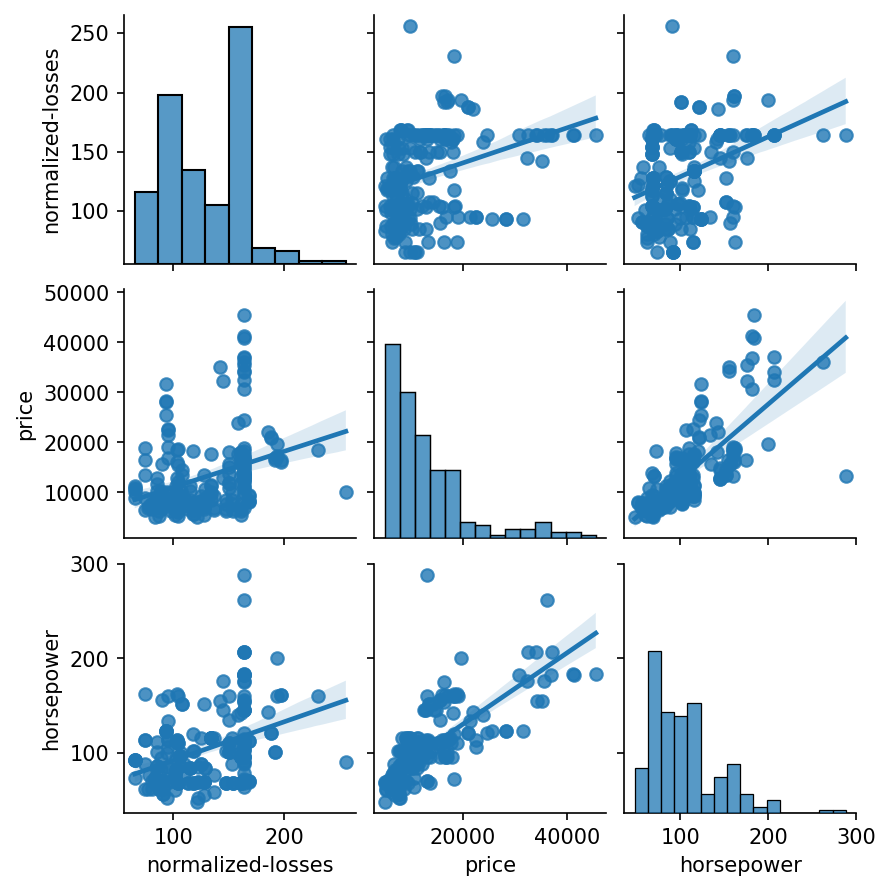

In [13]:
# Multivariate Analysis를 위한 시각화
# pair plot with plot type regression
sns.pairplot(df,height=2, vars = ['normalized-losses', 'price','horsepower'],  
             kind="reg")
plt.show()

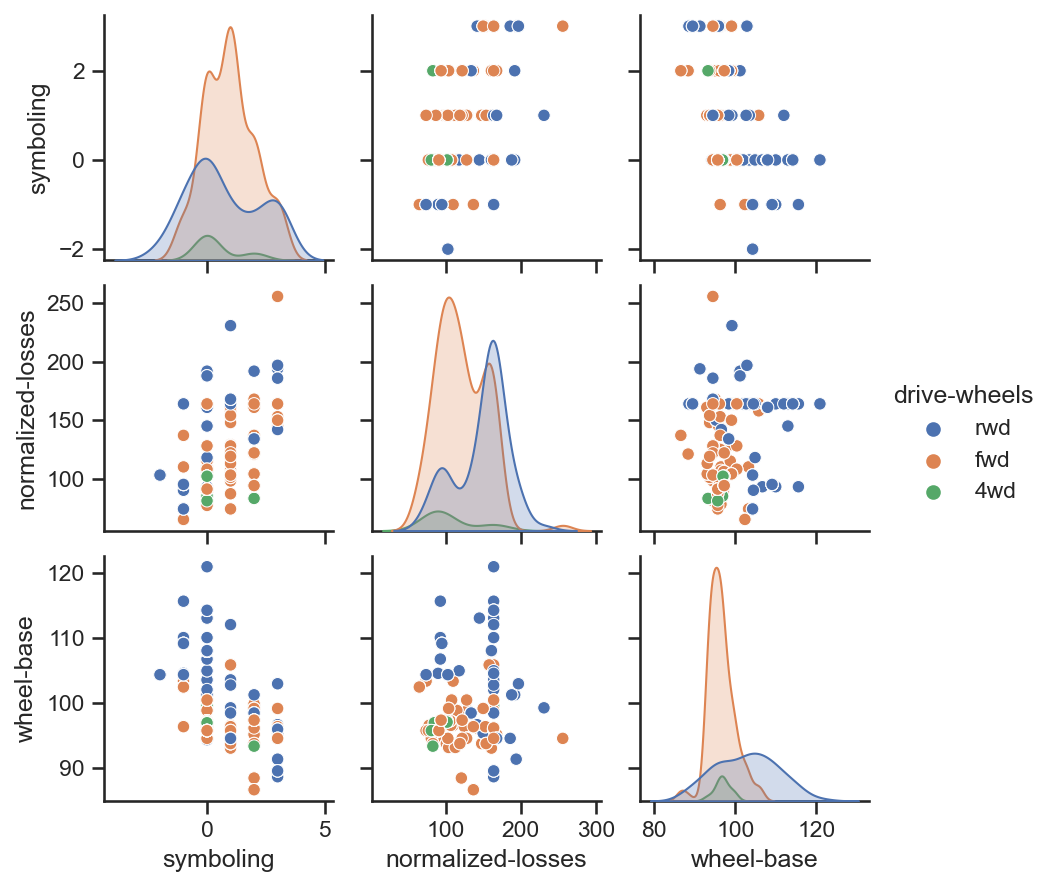

In [14]:
# pair plot (matrix scatterplot) of few columns 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,height=2,vars = ['symboling', 'normalized-losses','wheel-base'], 
             hue="drive-wheels")
plt.show()

In [15]:
# 상관계수 계산
from scipy import stats

corr = stats.pearsonr(df["price"], df["horsepower"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 1.5910332446597316e-39
cor:		 0.757945621793524


In [16]:
correlation = df.corr(method='pearson')
correlation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.442093,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071380,-0.035823,0.034606,-0.082201
normalized-losses,0.442093,1.000000,0.042699,0.155090,0.209908,-0.346399,0.262187,0.300268,-0.097432,0.371238,-0.344018,-0.307189,0.326489
wheel-base,-0.531954,0.042699,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.351985,-0.470414,-0.544082,0.583168
length,-0.357612,0.155090,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.554408,-0.670909,-0.704662,0.682986
width,-0.232919,0.209908,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.642176,-0.642704,-0.677218,0.728699
height,-0.541038,-0.346399,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.110114,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.262187,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750973,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.300268,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810705,-0.653658,-0.677470,0.861752
compression-ratio,-0.178515,-0.097432,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205717,0.324701,0.265201,0.070990
horsepower,0.071380,0.371238,0.351985,0.554408,0.642176,-0.110114,0.750973,0.810705,-0.205717,1.000000,-0.803140,-0.770905,0.757946


<AxesSubplot: >

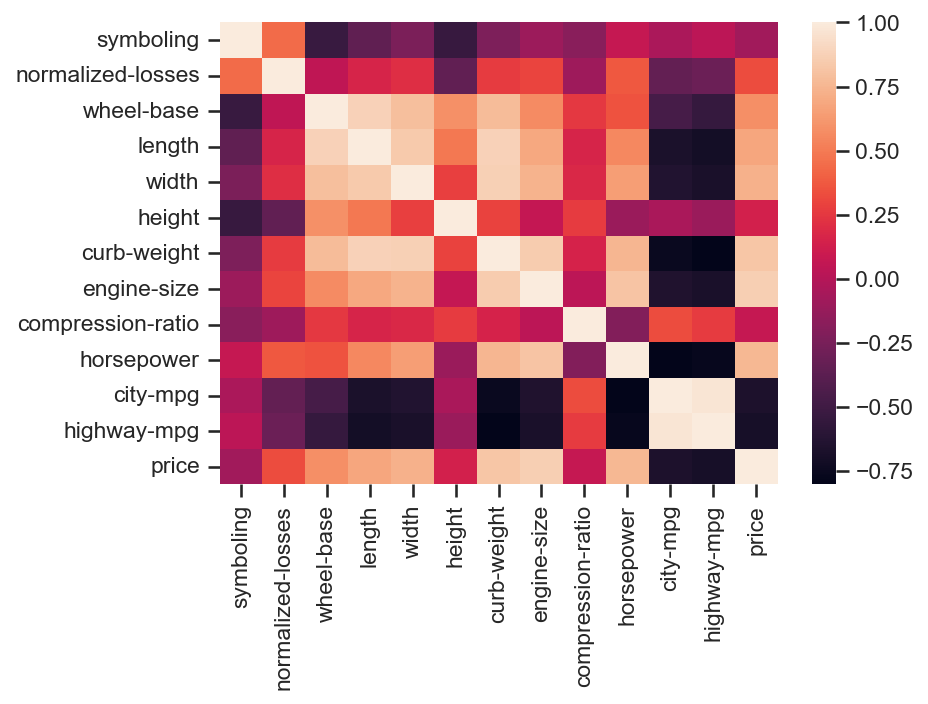

In [17]:
# heatmap 이용 상관관계 분석
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

In [18]:
# Multivariate Analysis over titanic dataset
# load data set
titanic=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/'
                    'hands-on-exploratory-data-analysis-with-python/'
                    'master/Chapter%207/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.shape

(891, 12)

In [20]:
# 결측치 여부체크

total = titanic.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [21]:
#percentage of women survived
women = titanic.loc[titanic.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

#percentage of men survived
men = titanic.loc[titanic.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(str(rate_women) +" % of women who survived." )
print(str(rate_men) + " % of men who survived." )

0.7420382165605095 % of women who survived.
0.18890814558058924 % of men who survived.


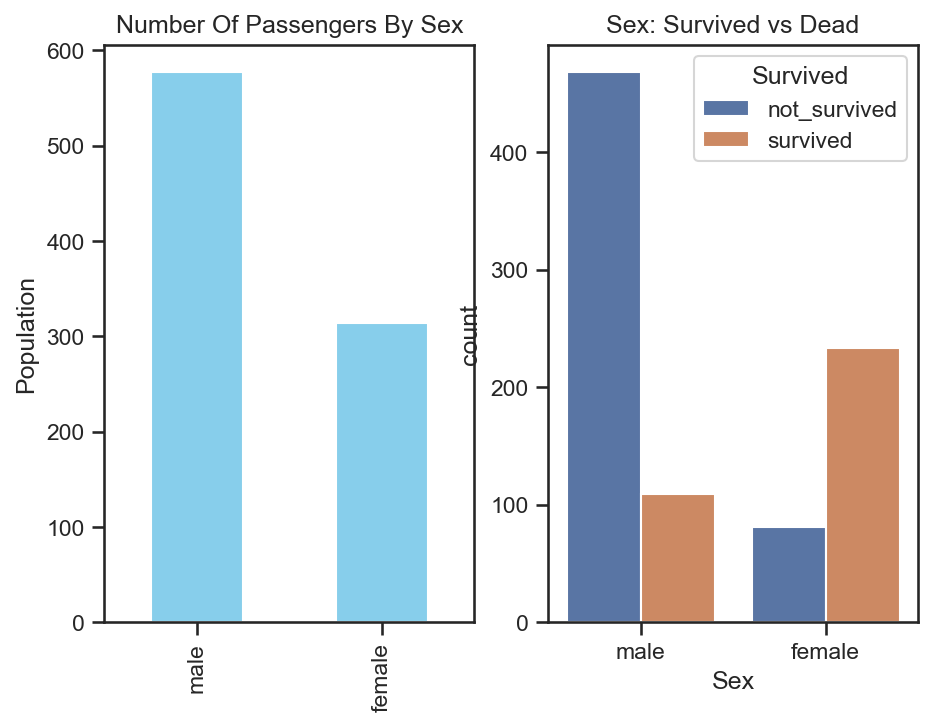

In [22]:
# gender간 차이에 대한 분석

titanic['Survived'] = titanic['Survived'].map({0:"not_survived", 1:"survived"})

fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")

sns.countplot(x = 'Sex', hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

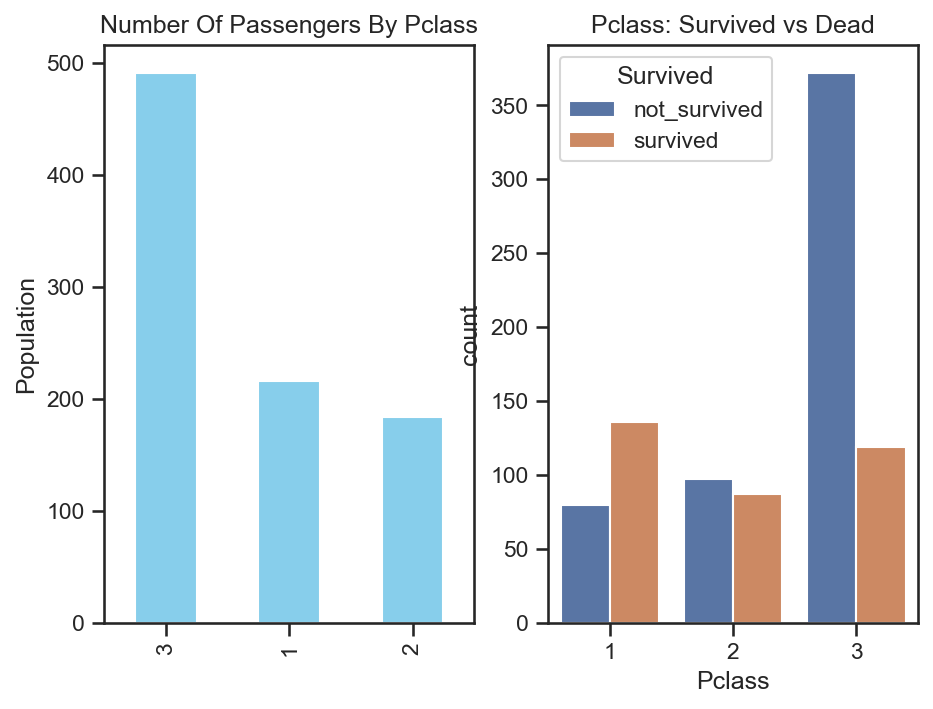

In [23]:
# Pclasses간 생존분석

fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Pclass"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Population")
sns.countplot(x = "Pclass", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Pclass: Survived vs Dead")
plt.show()

In [24]:
# embarked(승선)관련 생존 분석

titanic["Embarked"] = titanic["Embarked"].fillna("S")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,not_survived,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,not_survived,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,not_survived,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,not_survived,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


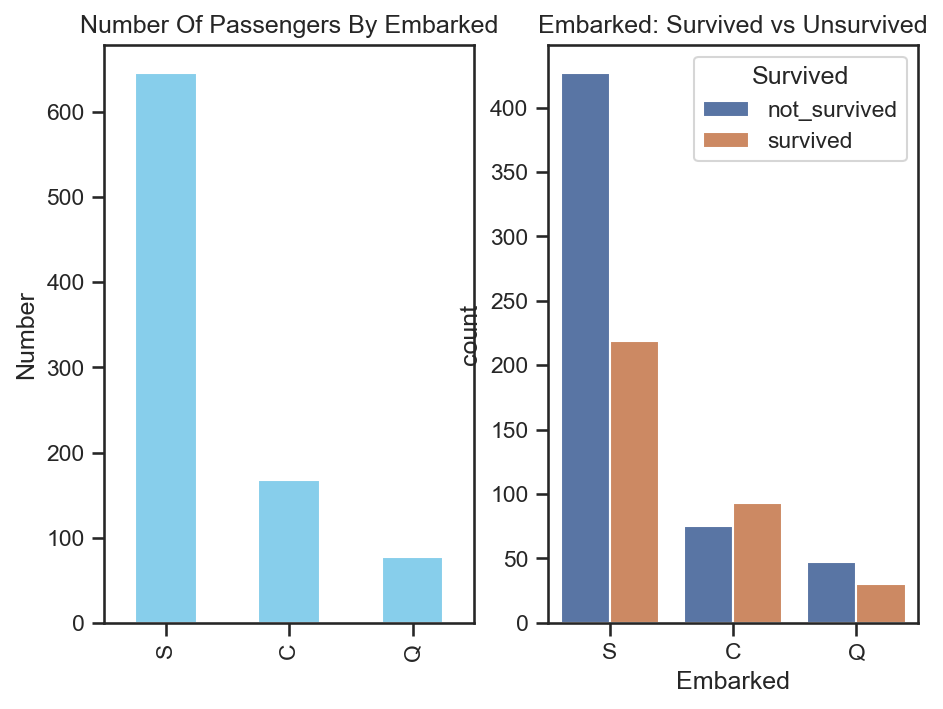

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (7, 5))
titanic["Embarked"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Embarked")
ax[0].set_ylabel("Number")
sns.countplot(x = "Embarked", hue = "Survived", data = titanic, ax = ax[1])
ax[1].set_title("Embarked: Survived vs Unsurvived")
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Density'>

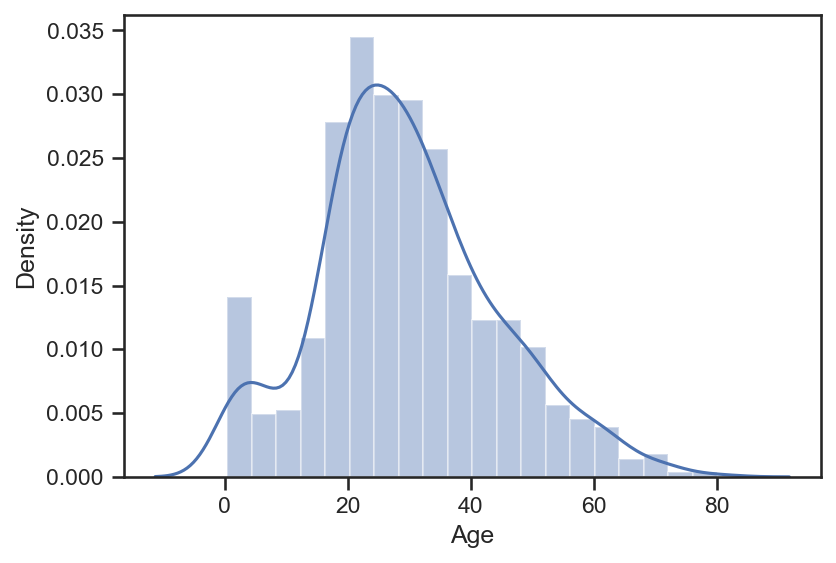

In [26]:
sns.distplot(titanic['Age'].dropna())

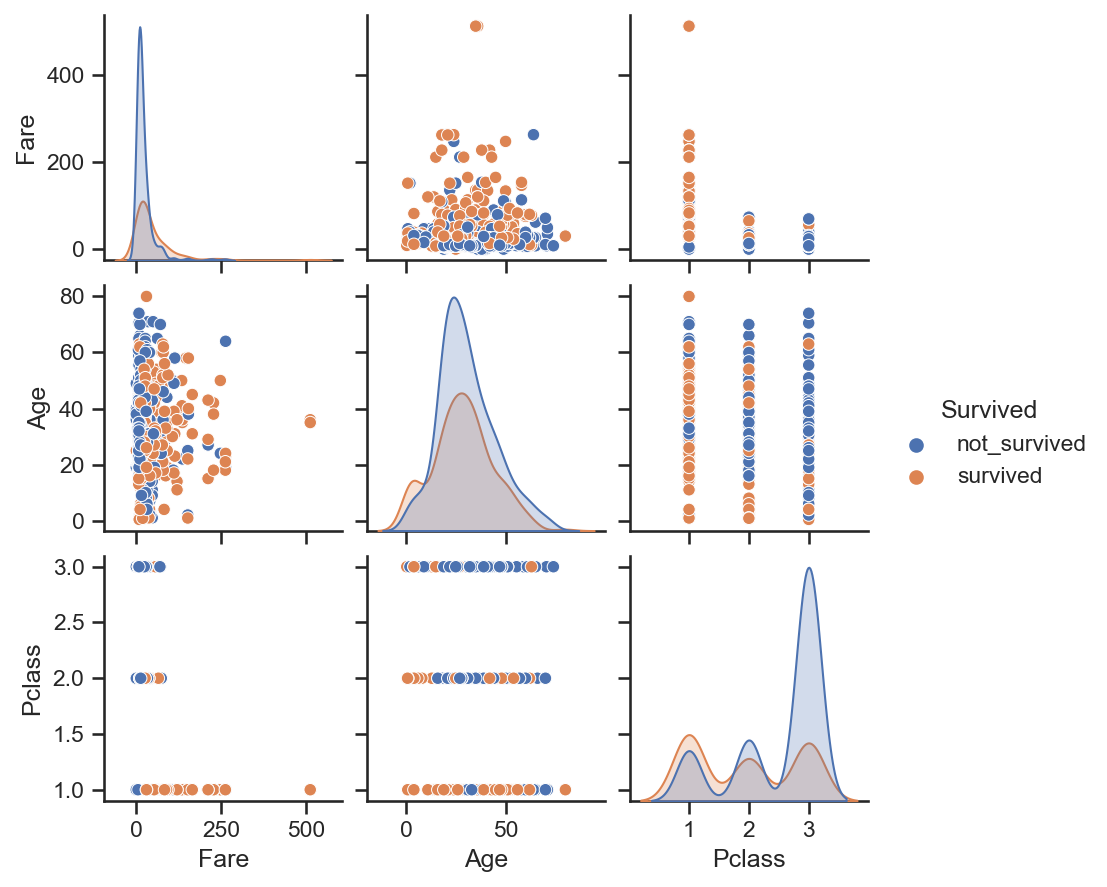

In [27]:
# multivariate analysis with variables Survived, Pclass,Fear and Age

sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic,height=2,vars = [ 'Fare','Age','Pclass'], hue="Survived")
plt.show()

In [28]:
# 승선여부를 integer값으로 바꾼후 heatmap이용 상관관계분석

titanic['Embarked'] = titanic['Embarked'].map({"S":1, "C":2,"Q":2,"NaN":0})
Tcorrelation = titanic.corr(method='pearson')
Tcorrelation

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.022204
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.074053
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.023233
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.068734
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.060814
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.162184
Embarked,-0.022204,-0.074053,0.023233,-0.068734,-0.060814,0.162184,1.000000


<AxesSubplot: >

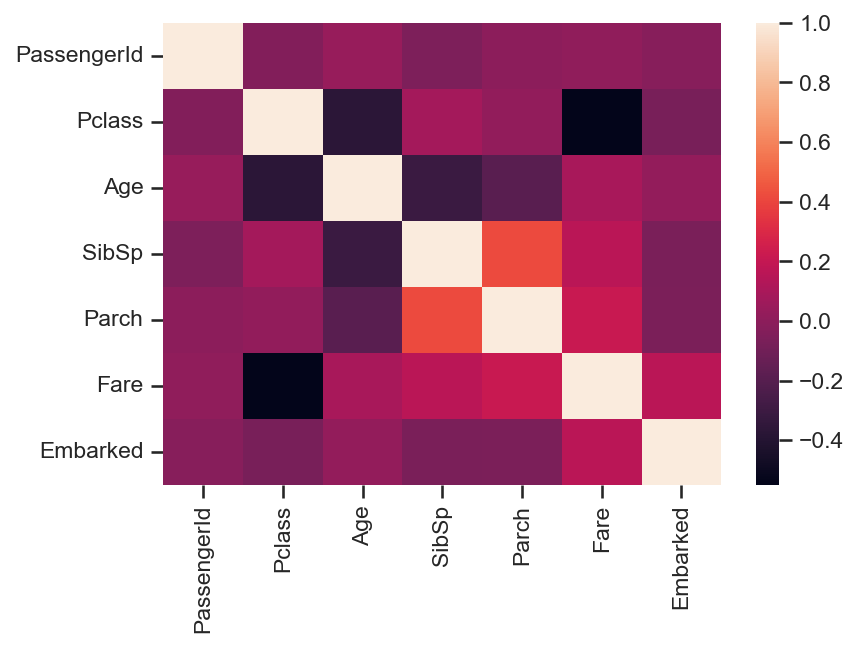

In [29]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,
            yticklabels=Tcorrelation.columns)